**Mechanobiology and Genomic data management and curation**.   
Course: *Genomic Fingerprinting School*.    
Author: *Marco Prenassi*.   
Licence: *CC BY 4.0 (http://creativecommons.org/licenses/by/4.0)*
#  NAVIGATING DATABANKS - QUAM AFM LITE

In [1]:
# We have to unpack the dictionaries, serialized with pickle: https://docs.python.org/3/library/pickle.html
import pickle

In [2]:

with open('./SUBMIT_QUAM-AFM/DICTIONARIES/CID_IUPAC.pkl', 'rb') as fp:
    CID_IUPAC_DICT = pickle.load(fp)

In [43]:
# We need to do some string queries with "regular expression" so we import re: https://docs.python.org/3/library/re.html
import re
id_list = []

# Beware: this is NOT a FAST data retrieval method!
for line in CID_IUPAC_DICT:
    result = re.search("methylpyridine", CID_IUPAC_DICT[line])
    if result is not None:
        id_list.append(line)
        print(line + ": " + CID_IUPAC_DICT[line])

print(f"\nLet's select the first result: \n\t{id_list[0]}: {CID_IUPAC_DICT[line]}")
    

131213001: 3-cyano-4-methylpyridine-2-carboxylic acid
84070882: 5-bromo-4-chloro-6-methylpyridine-2-carboxylic acid
84729007: 5-bromo-6-chloro-3-methylpyridine-2-carboxylic acid
130058644: 3-bromo-5-fluoro-2,6-dimethylpyridine
130121732: 2-bromo-3-fluoro-5,6-dimethylpyridine
130121733: 2-bromo-5-fluoro-3,6-dimethylpyridine
83485488: 2-bromo-5-fluoro-3,4-dimethylpyridine
130694829: 2-chloro-3-fluoro-4-iodo-5-methylpyridine
130773773: 2-chloro-6-fluoro-3-iodo-5-methylpyridine

Let's select the first result: 
	131213001: methyl 5-[(3-iodo-4-methylphenyl)carbamoyl]thiophene-2-carboxylate


Conformer3D_CID_131213001_K060_Amp040_df_008.jpg


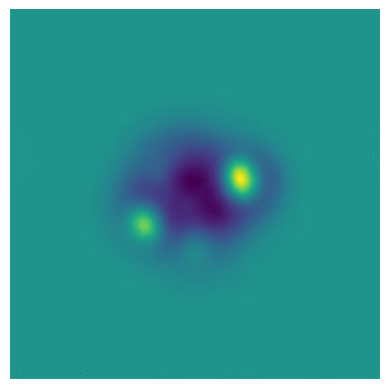

Conformer3D_CID_131213001_K060_Amp040_df_009.jpg


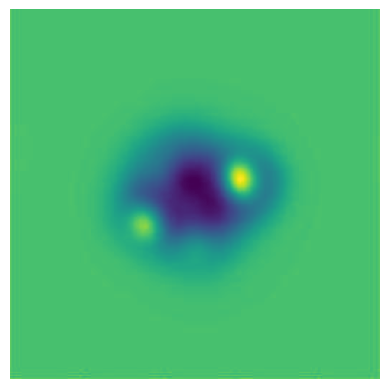

Conformer3D_CID_131213001_K060_Amp040_df_002.jpg


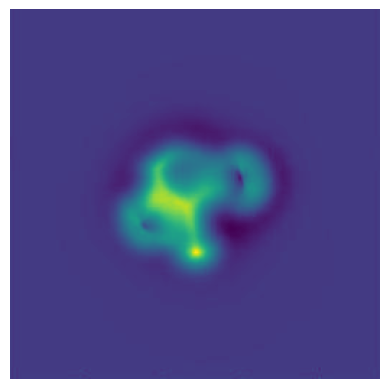

In [40]:
# Let's import a library to manage files and directories
import os
# Let's import some libraries to display images
import matplotlib.pyplot as plt
from PIL import Image

# Let's create a function to display imgae files given the filepath
def displayImage(filepath):   
    # Load the image
    image = Image.open(filepath)
    
    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.show()


# Select our subfolders (we use the root for this example)
folder_path = './'
# Let's check if it exists!
os.chdir(folder_path)

# List all files in the subfolder
filenames = []
def peek_image(id, peekNumber):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check the file name, in this case a Structured Identifier
            result = re.search('Conformer3D_CID_' + id, file)
            if result is not None:
                peekNumber -= 1
                print(file)
                displayImage(os.path.join(root, file))
                if peekNumber <= 0:
                    return

# Let's peek inside
peek_image(id_list[0], 3)

# This is a slow process!! (Still faster than manual)